In [ ]:
# Correlation and Linear Regression:
# Similarities: quantify the direction as well as the strength of relationship
# Differences: correlation is a single statistic while linear produces an equation

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import pandas_datareader as pdr
from sklearn.linear_model import LinearRegression

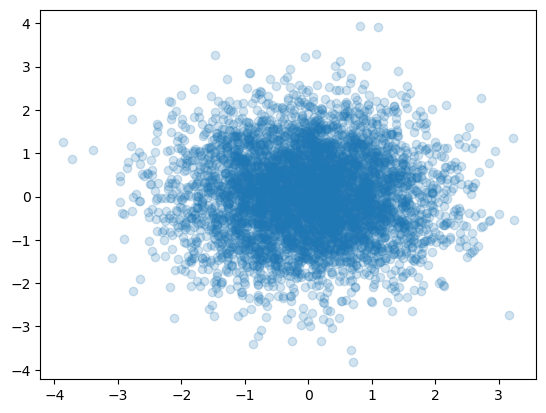

In [2]:
x = np.random.randn(5000)
y = np.random.randn(5000)
fig,ax=plt.subplots()
ax.scatter(x,y,alpha=.2)

In [3]:
tickers = ['AAPL','NFLX','IBM','MSFT','^GSPC']
start = dt.datetime(2020,1,1)
data = pdr.get_data_yahoo(tickers,start)
data = data['Adj Close']
data.head()

Symbols,AAPL,NFLX,IBM,MSFT,^GSPC
Date,,,,,
2020-01-02,73.561546,329.809998,111.586517,156.151962,3257.850098
2020-01-03,72.846352,325.899994,110.696594,154.207581,3234.850098
2020-01-06,73.426826,335.829987,110.498817,154.606186,3246.280029
2020-01-07,73.081497,330.750000,110.572983,153.196503,3237.179932
2020-01-08,74.257103,339.260010,111.495872,155.636688,3253.050049


In [4]:
lr = np.log(data/data.shift())
lr

Symbols,AAPL,NFLX,IBM,MSFT,^GSPC
Date,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN
2020-01-03,-0.009770,-0.011926,-0.008007,-0.012530,-0.007085
2020-01-06,0.007937,0.030014,-0.001788,0.002582,0.003527
2020-01-07,-0.004714,-0.015242,0.000671,-0.009160,-0.002807
2020-01-08,0.015958,0.025404,0.008312,0.015803,0.004890
...,...,...,...,...,...
2022-12-07,-0.013881,0.009316,-0.001561,-0.003064,-0.001864
2022-12-08,0.012060,0.005948,0.003457,0.012323,0.007494
2022-12-09,-0.003441,0.030942,-0.004952,-0.008035,-0.007377


In [9]:
def linear_regression(ticker_a,ticker_b):
    x = lr[ticker_a].iloc[1:].to_numpy().reshape(-1,1)
    y = lr[ticker_b].iloc[1:].to_numpy().reshape(-1,1)
# fitting model
    lin_regr = LinearRegression()
    lin_regr.fit(x,y)
    
    y_pred = lin_regr.predict(x)
    alpha = lin_regr.intercept_[0]
    beta = lin_regr.coef_[0,0]
    print(alpha)
    print(beta)
    
    fig,ax = plt.subplots()
    ax.set_title('Alpha: ' + str(round(alpha,5)) + ' , Beta: ' + str(round(beta,3)))
    ax.scatter(x,y)
    ax.plot(x,y_pred,c='r')

-0.00024373829132558482
0.5737718191563801


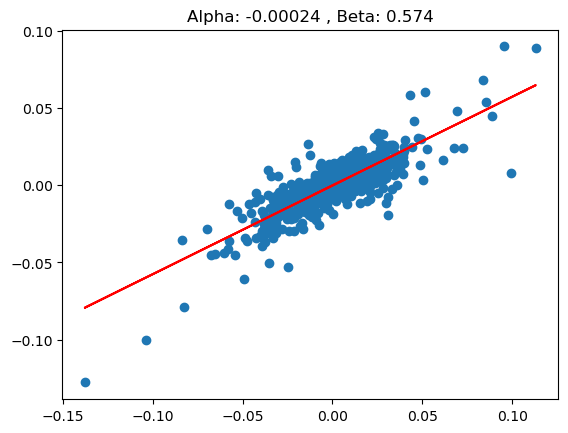

In [10]:
linear_regression('AAPL','^GSPC')

In [ ]:
# negative alpha indicates the security fails to generate returns at the same rate
# stock with the negative alpha is underperforming

-3.5410234424012796e-05
0.7688595816905213


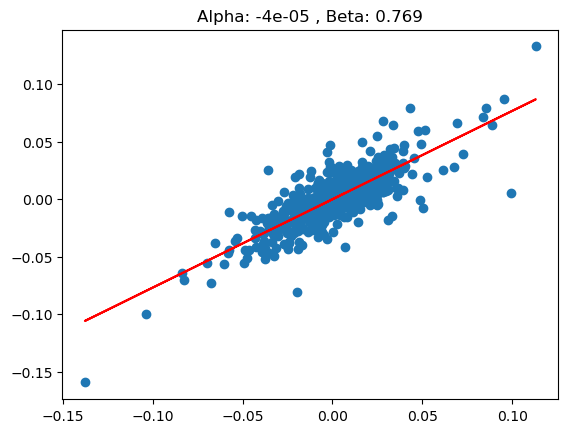

In [11]:
linear_regression('AAPL','MSFT')

-0.0006638286862416769
0.6806374339127287


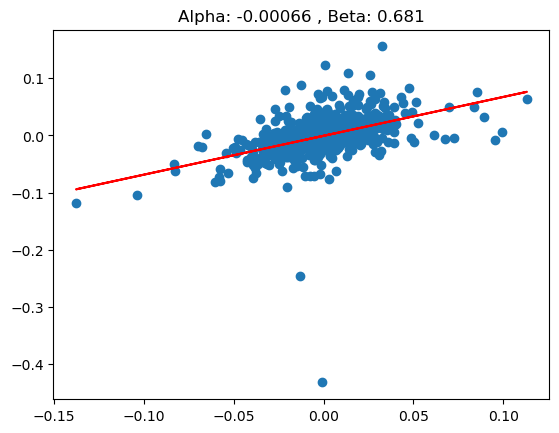

In [12]:
linear_regression('AAPL','NFLX')

In [ ]:
# Beta is a measure of stock's volatility in relation to overall market
# S&P 500 index beta 1
# High beta stocks are supposed to be riskier
# Low beta stocks poses low risk and low returns
# Beta = covariance/variance
    # if beta > 1: stock is more volatile than market expecting higher returns
    # if beta < 1: stock with low volatility and expects lower returns

# Interval = m, y, d

In [13]:
tickers = ['AAPL','NFLX','IBM','MSFT','^GSPC']
start = dt.datetime(2020,1,1)
end = dt.datetime(2021,1,1)
data = pdr.get_data_yahoo(tickers,start,end,interval='m')
data = data['Adj Close']
data.head()

Symbols,AAPL,NFLX,IBM,MSFT,^GSPC
Date,,,,,
2020-01-01,75.804993,345.089996,118.433975,165.494614,3225.520020
2020-02-01,66.951172,369.029999,107.244003,157.503281,2954.219971
2020-03-01,62.428356,375.500000,92.361160,153.741684,2584.590088
2020-04-01,72.128090,419.850006,104.542198,174.700699,2912.429932
2020-05-01,78.054466,419.730011,103.992683,178.639038,3044.310059


In [14]:
lr = np.log(data/data.shift())
lr

Symbols,AAPL,NFLX,IBM,MSFT,^GSPC
Date,,,,,
2020-01-01,NaN,NaN,NaN,NaN,NaN
2020-02-01,-0.124201,0.067073,-0.099249,-0.049492,-0.087860
2020-03-01,-0.069944,0.017381,-0.149400,-0.024172,-0.133668
2020-04-01,0.144424,0.111639,0.123884,0.127800,0.119421
2020-05-01,0.078963,-0.000286,-0.005270,0.022293,0.044287
2020-06-01,0.140190,0.080774,-0.020303,0.107645,0.018221
2020-07-01,0.152834,0.071732,0.017808,0.007344,0.053637
2020-08-01,0.194233,0.079929,0.003005,0.095394,0.067719
2020-09-01,-0.106370,-0.057378,-0.000381,-0.067361,-0.040018


In [15]:
# covariance
cov = lr.cov()
cov

Symbols,AAPL,NFLX,IBM,MSFT,^GSPC
Symbols,,,,,
AAPL,0.012633,0.004319,0.005932,0.006101,0.007068
NFLX,0.004319,0.003278,0.001901,0.002419,0.001937
IBM,0.005932,0.001901,0.006223,0.003098,0.005474
MSFT,0.006101,0.002419,0.003098,0.004055,0.003578
^GSPC,0.007068,0.001937,0.005474,0.003578,0.005657


In [16]:
# variance
var = lr['^GSPC'].var()
var

0.005656507453734323

In [19]:
# covariance of Apple
cov.loc['AAPL','^GSPC']/var
# if general market goes up by 10% then AAPL will rise up by 12.5%

1.2494967402920127

In [18]:
# verify the results:
cov.loc['^GSPC']/var

Symbols
AAPL     1.249497
NFLX     0.342430
IBM      0.967773
MSFT     0.632532
^GSPC    1.000000
Name: ^GSPC, dtype: float64

In [20]:
# another way of verifying results
# x is an independent value
x = lr['^GSPC'].iloc[1:].to_numpy().reshape(-1,1)
y = lr['AAPL'].iloc[1:].to_numpy().reshape(-1,1)

lin_regr = LinearRegression()
lin_regr.fit(x,y)
# beta value
lin_regr.coef_[0,0]

1.249496740292013

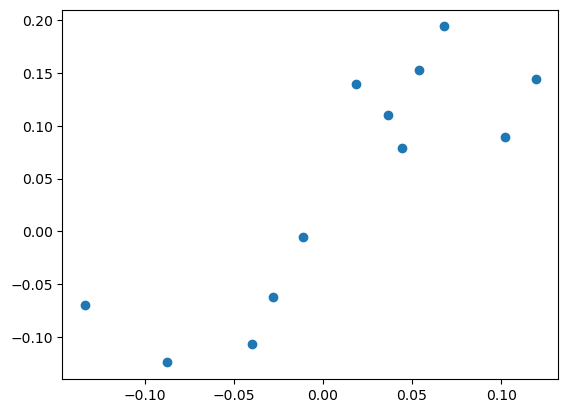

In [21]:
fig,ax=plt.subplots()
ax.scatter(x,y)

In [ ]:
# Capital Asset Pricing Model (CAPM): relationship b/w systematic risk and expected returns
# provides the way to estimate to determine expected return for stocks
# provide a way to estimate the required return
# CAPM: ERi = Rf + BETAi(ERm - Rf)
    # ERi = expected return from investment
    # Rf = risk free return
    # BETAi = beta of investment
    # (ERm - Rf) = market risk premium
    # calculate investment risk and what return on investment an investor should expect

In [22]:
tickers = ['AAPL','NFLX','IBM','MSFT','^GSPC']
start = dt.datetime(2015,12,1)
end = dt.datetime(2021,1,1)
data = pdr.get_data_yahoo(tickers,start,end,interval='m')
data = data['Adj Close']
data.head()

Symbols,AAPL,NFLX,IBM,MSFT,^GSPC
Date,,,,,
2015-12-01,24.090906,114.379997,96.002823,49.740341,2043.939941
2016-01-01,22.278242,91.839996,87.052719,49.390690,1940.239990
2016-02-01,22.129482,93.410004,91.405708,45.616238,1932.229980
2016-03-01,25.079943,102.230003,106.729706,49.871727,2059.739990
2016-04-01,21.570728,90.029999,102.846725,45.031742,2065.300049


In [23]:
lr = np.log(data/data.shift())
lr

Symbols,AAPL,NFLX,IBM,MSFT,^GSPC
Date,,,,,
2015-12-01,NaN,NaN,NaN,NaN,NaN
2016-01-01,-0.078224,-0.219478,-0.097864,-0.007054,-0.052068
2016-02-01,-0.006700,0.016951,0.048794,-0.079498,-0.004137
2016-03-01,0.125158,0.090227,0.154992,0.089191,0.063905
2016-04-01,-0.150731,-0.127082,-0.037060,-0.102087,0.002696
...,...,...,...,...,...
2020-09-01,-0.106370,-0.057378,-0.000381,-0.067361,-0.040018
2020-10-01,-0.061888,-0.049797,-0.085854,-0.038086,-0.028056
2020-11-01,0.089481,0.030962,0.100944,0.055711,0.102146


In [24]:
# covariance and variance
cov = lr.cov()
print(cov)
var = lr['^GSPC'].var()
print(var)

Symbols      AAPL      NFLX       IBM      MSFT     ^GSPC
Symbols                                                  
AAPL     0.007254  0.003469  0.002453  0.002920  0.002413
NFLX     0.003469  0.010394  0.002634  0.002664  0.001727
IBM      0.002453  0.002634  0.005315  0.001904  0.002403
MSFT     0.002920  0.002664  0.001904  0.002638  0.001534
^GSPC    0.002413  0.001727  0.002403  0.001534  0.001924
0.0019235693497498328


In [25]:
# beta
beta = cov.loc['AAPL','^GSPC']/var
beta

1.2545574043435366

In [26]:
cov.loc['^GSPC']/var

Symbols
AAPL     1.254557
NFLX     0.897581
IBM      1.249102
MSFT     0.797269
^GSPC    1.000000
Name: ^GSPC, dtype: float64

In [27]:
x = lr['^GSPC'].iloc[1:].to_numpy().reshape(-1,1)
y = lr['AAPL'].iloc[1:].to_numpy().reshape(-1,1)

lin_regr = LinearRegression()
lin_regr.fit(x,y)
# beta value
lin_regr.coef_[0,0]

1.2545574043435357

In [28]:
# risk free return, market return and expected return
rfr = 0.013
mr = 0.105
er = rfr + beta * (mr-rfr)
er
# 12% of the rate of return arises solely b/c of appreciation

0.12841928119960536

In [ ]:
# CAPM: 
    # 1. risk free return
    # 2. Beta
    # 3. market return - risk free return (market premium)
# Risk free rate: 10 yr tenure 3%
# Beta value: relation b/w investment and market, how market moves accordingly to how the stock moves
# Market Beta = 1: AAPL = 0.99 and Facebook = 1.2% means when the market goes up by 1% then AAPl wil rise by 1% and Facebook by 1.2%
# Market premium: AAPL = 3% + 0.99 * (9 - 3) = 8.9%, Facebook = 3% + 1.2(9 - 9) = 10.2%

In [29]:
# shares in Shilligor has a betw of 0.9, the expected returns to the market are 10% and risk free rate is 4%
# find the cost of equity for Shilligor
# epr = 4 + 0.9 * (10 - 4) = 9.4

9.4

In [ ]:
# investors expect a rate of return of 8% from ordinary shares in ALgol which have a beta value of 1.2 while the expected returns
# to the market are 7%. Find the expected rate of return from ordinary shares in Shilligor which has a beta value of 1.8%
# 8 = x + 1.2 * (7 - x): 8 = x + 8.4 - 1.2x: 8 - 8.4 = x - 1.2x: -0.4 = -0.2: x = -0.4/-0.2: x = 2
# expr = 2 + 1.8 * (7 - 2) = 11
    # 1. lower potential and risk comes from the company w/ lower beta value
    # 2. return from company w/ beta 1 goes along w/ the market
    # 3. company w/ highest potential and risk has highest beta value 
        # (increased risk and higher volatility relative to overall market i.e. greater sensitivity to market fluctuations)